In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [29]:
dataset = pd.read_csv("finalData.csv")
dataset.count()

description    32120
category       17120
civic_issue    32120
dtype: int64

In [24]:
'''index=0
count = 0
for i in dataset.description:
    #print(index)
    if "#AirtelPayment" in i or "register now" in i:
        dataset = dataset.drop(labels = index)

    index+=1
#print(count)
dataset.count()'''

Unnamed: 0     32120
description    32120
category       17120
civic_issue    32120
dtype: int64

In [25]:
# dataset.to_csv("finalData.csv")

([<matplotlib.patches.Wedge at 0x18118f0e848>,
 [Text(-0.11383991588231322, 1.094093448272088, 'Civic Issue'),
  Text(0.11383991588231333, -1.094093448272088, 'Non Civic Issue')],
 [Text(-0.06209449957217084, 0.596778244512048, '53.30'),
  Text(0.062094499572170905, -0.596778244512048, '46.70')])

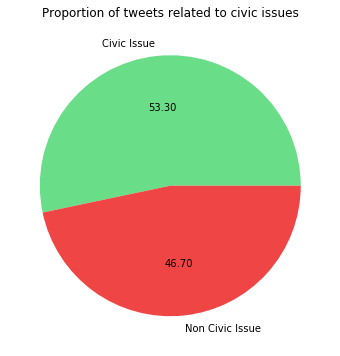

In [30]:
plt.figure(figsize=(6,6))
plt.title("Proportion of tweets related to civic issues")
plt.pie(dataset.civic_issue.value_counts(), labels=["Civic Issue","Non Civic Issue"],autopct="%0.2f",colors=["#6add89","#f04545"])

In [35]:
civic = dataset[dataset["civic_issue"]==1]
civic.count()

description    17120
category       17120
civic_issue    17120
dtype: int64

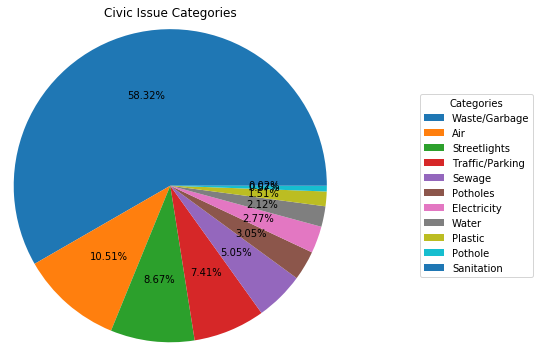

'plt.figure(figsize=(6,6))\nplt.title("Categories of civic issues")\nlabels=civic.category.unique()\npatches = plt.pie(civic.category.value_counts(),autopct="%0.2f")#,colors=["#6add89","#f04545"])\nplt.legend(patches,labels,loc = "best")\nplt.show()'

In [33]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = civic.category.value_counts()
label = civic.category.unique()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%".format(pct)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),radius=1.2)


ax.legend(wedges, label,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1.25, 0, 1, 1))

plt.setp(autotexts, size=10)
ax.xaxis.set_label_position('top')
#ax.set_xlabel('X-label')
ax.set_title('Civic Issue Categories')
#plt.title("Civic Issue Categories")

plt.show()

'''plt.figure(figsize=(6,6))
plt.title("Categories of civic issues")
labels=civic.category.unique()
patches = plt.pie(civic.category.value_counts(),autopct="%0.2f")#,colors=["#6add89","#f04545"])
plt.legend(patches,labels,loc = "best")
plt.show()'''

<BarContainer object of 11 artists>

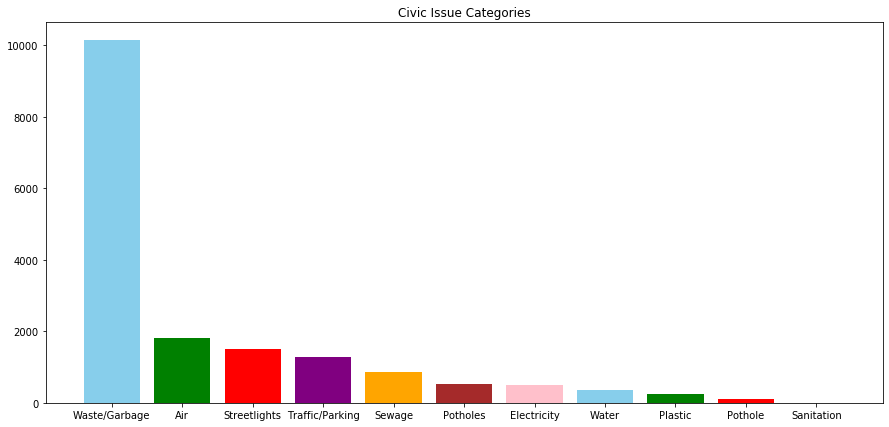

In [82]:
plt.figure(figsize=(15,7))
plt.title("Civic Issue Categories")
plt.bar(label, height = data,color = ['skyblue','green','red','purple','orange','brown','pink'])

## WordCloud for description/tweets

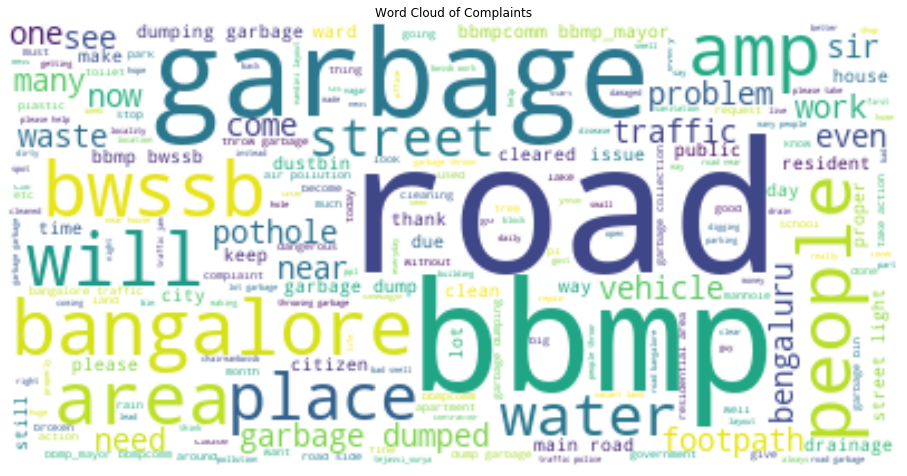

In [40]:
def word_cloud(df):
    df['description'] = df['description'].str.lower()
    des = df.description.str.split(' ')
    #des.head()
    des_cleaned = []

    #removing punctuation
    for text in des:
        text = [x.strip(string.punctuation) for x in text]
        des_cleaned.append(text)

    #des_cleaned[0]

    #joining all the text
    text_des = [" ".join(text) for text in des_cleaned]
    fin_text = " ".join(text_des)
    #final_text_spam[:500]
    wordcloud_spam = WordCloud(background_color="white").generate(fin_text)

    # Lines 2 - 5
    plt.figure(figsize = (16,16))
    plt.title("Word Cloud of Complaints")
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
word_cloud(civic)